In [1]:
import tweepy
import datetime

In [2]:
consumer_key = "mPvEuZkAkq4bCv16N8U2kBS8B"
consumer_secret = "zfPqeVOivbNClHXW1sQ1eetK55kVBd4o4mOAWPDS6kfdtyzxmO"
access_token = "1251920853878611970-Z0Jj9QGk3SGiXlGcz14W7H3XWbnrRH"
access_token_secret = "OFVn729thIsPP48GETOBEaZR5VyMr9mJRu9A0FJ3a8wxe"
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth,wait_on_rate_limit = True)

In [4]:
import pandas as pd
twitter_frame = pd.read_csv("covid_congress.csv")
twitter_frame = twitter_frame.loc[:, twitter_frame.columns.intersection(["Twitter Handle","party", "lastName", "firstName", "state"])]
twitter_frame = twitter_frame.set_index("party")
twitter_frame

,state,Twitter Handle,lastName,firstName
party,,,,
Republican,LA,@RepAbraham,Abraham,Ralph
Democrat,NC,@RepAdams,Adams,Alma
Republican,AL,@Robert_Aderholt,Aderholt,Robert
Democrat,CA,@RepPeteAguilar,Aguilar,Pete
Republican,TN,@SenAlexander,Alexander,Lamar
...,...,...,...,...
Democrat,KY,@RepJohnYarmuth,Yarmuth,John
Republican,FL,@RepTedYoho,Yoho,Ted
Republican,AK,@repdonyoung,Young,Don


In [5]:
dem_frame = twitter_frame.drop(labels = "Republican", axis = 0)
dem_frame

,state,Twitter Handle,lastName,firstName
party,,,,
Democrat,NC,@RepAdams,Adams,Alma
Democrat,CA,@RepPeteAguilar,Aguilar,Pete
Democrat,TX,@RepColinAllred,Allred,Colin
Democrat,IA,@RepCindyAxne,Axne,Cynthia
Democrat,WI,@SenatorBaldwin,Baldwin,Tammy
...,...,...,...,...
Democrat,RI,@SenWhitehouse,Whitehouse,Sheldon
Democrat,PA,@RepSusanWild,Wild,Susan
Democrat,FL,@RepWilson,Wilson,Frederica


In [141]:
dem_handle_list = []

for handle in dem_frame["Twitter Handle"]:
    dem_handle_list.append(handle)
    
len(dem_handle_list)

285

### Tweets from All of April:

In [24]:
april_dict = {}
start_date = datetime.datetime(2020, 4, 1, 0, 0, 0)
end_date = datetime.datetime(2020, 4, 30, 0, 0, 0)

for handle in dem_handle_list:
    tweets = []
    username = handle

    for tweet in api.user_timeline(id = username, include_rts = True, count = 100):
        if tweet.created_at < end_date and tweet.created_at > start_date:
            tweet = tweet.text
            if tweet.find("China") >= 0 or tweet.find("Chinese") >= 0 or tweet.find("Beijing") >= 0 or tweet.find("Wuhan") >= 0:
                tweets.append(tweet)
    april_dict[handle] = tweets
    
april_dict

{'@RepAdams': [],
 '@RepPeteAguilar': [],
 '@RepColinAllred': [],
 '@RepCindyAxne': [],
 '@SenatorBaldwin': [],
 '@RepBarragan': [],
 '@RepKarenBass': [],
 '@RepBeatty': [],
 '@SenatorBennet': [],
 '@RepBera': ['The #COVID19 pandemic has reinforced this. Since originating in China in Dec. 2019, the virus has quickly spread to… https://t.co/HhjaJwS5y0'],
 '@RepDonBeyer': [],
 '@SanfordBishop': [],
 '@repblumenauer': [],
 '@SenBlumenthal': [],
 '@RepLBR': [],
 '@RepBonamici': ['RT @ChineseOregon: Thank you, Mrs. Bonamici @RepBonamici . We are grateful for the love and support from every corner of Oregon. We are all…',
  'I spoke with @ChineseOregon’s President Hongcheng Zhao this weekend, and it was heartening to hear how the communit… https://t.co/mOnIBXZEyM',
  "RT @ChineseOregon: 12,390 Halyard Fluidshield N95 Respirators have arrived at Portland after 3-week+ waiting. We couldn't make it without t…"],
 '@SenBooker': [],
 '@CongBoyle': [],
 '@RepBrindisi': ['ICYMI: we should never hav

In [25]:
april_chinatweets_dict = {}
count = 0

for handle in dem_handle_list:
    for tweet in april_dict[handle]:
        april_chinatweets_dict[handle] = len(april_dict[handle])
    count += len(april_dict[handle])
    
april_chinatweets_dict

{'@RepBera': 1,
 '@RepBonamici': 3,
 '@RepBrindisi': 1,
 '@SenatorCarper': 2,
 '@JoaquinCastrotx': 1,
 '@RepJudyChu': 4,
 '@RepDannyDavis': 2,
 '@RepDelBene': 1,
 '@RepEliotEngel': 1,
 '@RepHastingsFL': 1,
 '@jahimes': 1,
 '@maziehirono': 1,
 '@RepRoKhanna': 1,
 '@JimLangevin': 2,
 '@RepRickLarsen': 2,
 '@SenatorLeahy': 3,
 '@RepLipinski': 2,
 '@RepZoeLofgren': 1,
 '@BettyMcCollum04': 1,
 '@RepMcGovern': 1,
 '@RepGregoryMeeks': 1,
 '@BillPascrell': 4,
 '@SenGaryPeters': 2,
 '@RepDeanPhillips': 1,
 '@RepMikeQuigley': 1,
 '@RepSarbanes': 1,
 '@SenatorShaheen': 1,
 '@RepShalala': 1,
 '@BradSherman': 1,
 '@RepSlotkin': 3,
 '@RepSpeier': 1,
 '@RepGregStanton': 1,
 '@RepTomSuozzi': 2,
 '@CongressmanJVD': 1,
 '@RonWyden': 1}

In [26]:
count

54

In [27]:
april = pd.DataFrame.from_dict(april_chinatweets_dict, orient = "index")
april = april.reset_index()
april = april.rename(columns = {"index":"Twitter Handle"})
april

,Twitter Handle,0
0,@RepBera,1
1,@RepBonamici,3
2,@RepBrindisi,1
3,@SenatorCarper,2
4,@JoaquinCastrotx,1
5,@RepJudyChu,4
6,@RepDannyDavis,2
7,@RepDelBene,1
8,@RepEliotEngel,1
9,@RepHastingsFL,1


In [28]:
count_frame = dem_frame.copy()
count_frame = dem_frame.merge(april, left_on="Twitter Handle", right_on="Twitter Handle")
pd.set_option("display.max_rows", None)
count_frame.columns = ["State", "Twitter Handle", "Last Name", "First Name", "April Count"]
count_frame

,State,Twitter Handle,Last Name,First Name,Week 4 Count
0,CA,@RepBera,Bera,Ami,1
1,OR,@RepBonamici,Bonamici,Suzanne,3
2,NY,@RepBrindisi,Brindisi,Anthony,1
3,DE,@SenatorCarper,Carper,Thomas,2
4,TX,@JoaquinCastrotx,Castro,Joaquin,1
5,CA,@RepJudyChu,Chu,Judy,4
6,IL,@RepDannyDavis,Davis,Danny,2
7,WA,@RepDelBene,DelBene,Suzan,1
8,NY,@RepEliotEngel,Engel,Eliot,1
9,FL,@RepHastingsFL,Hastings,Alcee,1


In [29]:
by_state = count_frame4.groupby("State").sum()
by_state.to_csv("dems_april.csv")
by_state

,Week 4 Count
State,
AZ,1
CA,9
CT,1
DE,2
FL,2
HI,1
IL,5
MA,1
MD,1


In [30]:
dems_april = pd.read_csv("dems_april.csv")
states = []
for state in dems_april["State"]:
    states.append(state)
states

['AZ',
 'CA',
 'CT',
 'DE',
 'FL',
 'HI',
 'IL',
 'MA',
 'MD',
 'MI',
 'MN',
 'NH',
 'NJ',
 'NY',
 'OR',
 'RI',
 'TX',
 'VT',
 'WA']

In [134]:
import geopandas as gpd
import matplotlib.pyplot as plt
import descartes
from shapely.geometry import Point, Polygon
%matplotlib inline

In [16]:
usa = gpd.read_file("states.shp")

In [108]:
usa = usa.set_index("STATE_NAME")
usa.head()

,DRAWSEQ,STATE_FIPS,SUB_REGION,STATE_ABBR,geometry
STATE_NAME,,,,,
Hawaii,1,15,Pacific,HI,"MULTIPOLYGON (((-160.07380 22.00418, -160.0497..."
Washington,2,53,Pacific,WA,"MULTIPOLYGON (((-122.40202 48.22522, -122.4628..."
Montana,3,30,Mountain,MT,"POLYGON ((-111.47543 44.70216, -111.48080 44.6..."
Maine,4,23,New England,ME,"MULTIPOLYGON (((-69.77728 44.07415, -69.85993 ..."
North Dakota,5,38,West North Central,ND,"POLYGON ((-98.73044 45.93827, -99.00683 45.939..."


In [110]:
usa.drop("Hawaii")
usa.drop("Alaska")

,DRAWSEQ,STATE_FIPS,SUB_REGION,STATE_ABBR,geometry
STATE_NAME,,,,,
Hawaii,1,15,Pacific,HI,"MULTIPOLYGON (((-160.07380 22.00418, -160.0497..."
Washington,2,53,Pacific,WA,"MULTIPOLYGON (((-122.40202 48.22522, -122.4628..."
Montana,3,30,Mountain,MT,"POLYGON ((-111.47543 44.70216, -111.48080 44.6..."
Maine,4,23,New England,ME,"MULTIPOLYGON (((-69.77728 44.07415, -69.85993 ..."
North Dakota,5,38,West North Central,ND,"POLYGON ((-98.73044 45.93827, -99.00683 45.939..."
South Dakota,6,46,West North Central,SD,"POLYGON ((-102.78838 42.99530, -103.00588 42.9..."
Wyoming,7,56,Mountain,WY,"POLYGON ((-104.05362 41.69822, -104.05550 41.5..."
Wisconsin,8,55,East North Central,WI,"MULTIPOLYGON (((-87.74856 44.96162, -87.83999 ..."
Idaho,9,16,Mountain,ID,"POLYGON ((-117.02630 43.67903, -117.02379 43.7..."


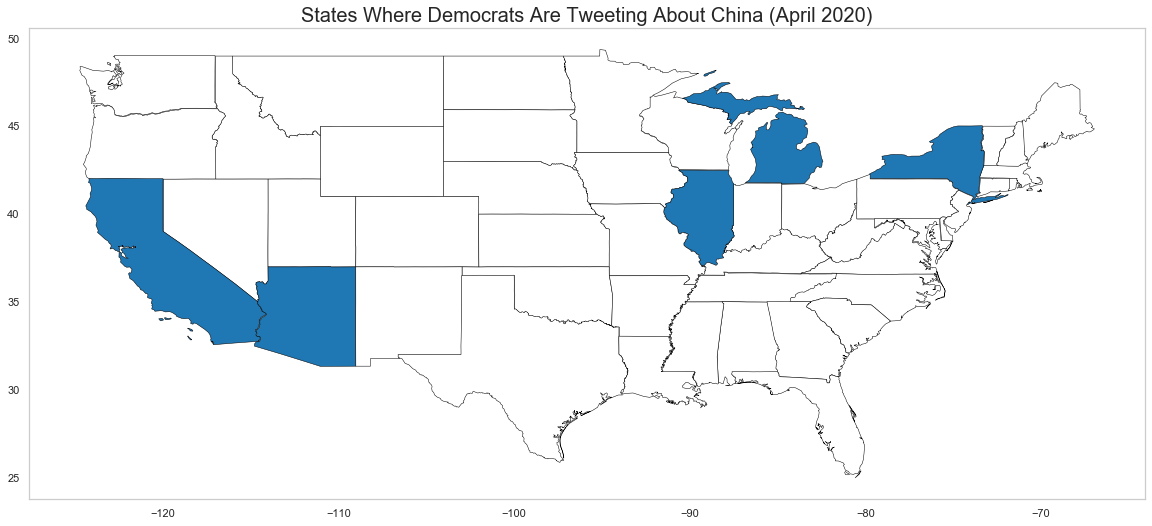

In [120]:
# usa.plot(figsize = (20, 20))
fig, ax = plt.subplots(figsize = (20,20))
ax.grid(False)

ax.set_title("States Where Democrats Are Tweeting About China (April 2020)", fontsize = 20)

count = 0

for state in usa["STATE_ABBR"]:
    if state == "AK" or state == "HI":
        continue
    if state in states:
        usa[usa.STATE_ABBR == state].plot(ax = ax, color = "tab:blue", edgecolor = "black", linewidth = .5)
        count += 1
    else:
        usa[usa.STATE_ABBR == state].plot(ax = ax, color = "white", edgecolor = "black", linewidth = .5)
        count += 1
        continue

### Tweets from First Half of April:

In [39]:
before_dict = {}
start_date = datetime.datetime(2020, 4, 1, 0, 0, 0)
end_date = datetime.datetime(2020, 4, 15, 0, 0, 0)

for handle in dem_handle_list:
    tweets = []
    username = handle

    for tweet in api.user_timeline(id = username, include_rts = True, count = 100):
        if tweet.created_at < end_date and tweet.created_at > start_date:
            tweet = tweet.text
            if tweet.find("China") >= 0 or tweet.find("Chinese") >= 0 or tweet.find("Beijing") >= 0 or tweet.find("Wuhan") >= 0:
                tweets.append(tweet)
    before_dict[handle] = tweets
    
before_dict

{'@RepAdams': [],
 '@RepPeteAguilar': [],
 '@RepColinAllred': [],
 '@RepCindyAxne': [],
 '@SenatorBaldwin': [],
 '@RepBarragan': [],
 '@RepKarenBass': [],
 '@RepBeatty': [],
 '@SenatorBennet': [],
 '@RepBera': [],
 '@RepDonBeyer': [],
 '@SanfordBishop': [],
 '@repblumenauer': [],
 '@SenBlumenthal': [],
 '@RepLBR': [],
 '@RepBonamici': [],
 '@SenBooker': [],
 '@CongBoyle': [],
 '@RepBrindisi': ['ICYMI: we should never have to rely on China in our time of need. It’s time to start manufacturing emergency suppli… https://t.co/e1eR9jwRVP'],
 '@RepAnthonyBrown': [],
 '@SenSherrodBrown': [],
 '@RepBrownley': [],
 '@RepCheri': [],
 '@GKButterfield': [],
 '@RepCardenas': [],
 '@SenatorCantwell': [],
 '@RepCarbajal': [],
 '@SenatorCardin': [],
 '@SenatorCarper': [],
 '@RepAndreCarson': [],
 '@RepCartwright': [],
 '@RepEdCase': [],
 '@SenBobCasey': [],
 '@RepCasten': [],
 '@USRepKCastor': [],
 '@JoaquinCastrotx': [],
 '@RepJudyChu': [],
 '@davidcicilline': [],
 '@RepGilCisneros': [],
 '@RepKClark

In [143]:
before_dict["@RepGregoryMeeks"]

['RT @AriMelber: FACT-CHECK:\n\nPres. Trump is trying to blame the WHO for its early coronavirus response and basically "taking China\'s word" -…']

In [137]:
before_chinatweets_dict = {}
count = 0

for handle in dem_handle_list:
    for tweet in before_dict[handle]:
        before_chinatweets_dict[handle] = len(before_dict[handle])
    count += len(before_dict[handle])
    
before_chinatweets_dict

{'@RepBrindisi': 1,
 '@RepDannyDavis': 1,
 '@RepZoeLofgren': 1,
 '@RepGregoryMeeks': 1,
 '@RepSlotkin': 1,
 '@RepGregStanton': 1}

In [138]:
count

6

In [43]:
before = pd.DataFrame.from_dict(before_chinatweets_dict, orient = "index")
before = before.reset_index()
before = before.rename(columns = {"index":"Twitter Handle"})
before

,Twitter Handle,0
0,@RepBrindisi,1
1,@RepDannyDavis,1
2,@RepZoeLofgren,1
3,@RepGregoryMeeks,1
4,@RepSlotkin,1
5,@RepGregStanton,1


In [146]:
len(before)

6

In [77]:
before_count_frame = dem_frame.copy()
before_count_frame = dem_frame.merge(before, left_on="Twitter Handle", right_on="Twitter Handle")
pd.set_option("display.max_rows", None)
before_count_frame.columns = ["State", "Twitter Handle", "Last Name", "First Name", "April 1-15 Count"]
before_count_frame

,State,Twitter Handle,Last Name,First Name,April 1-15 Count
0,NY,@RepBrindisi,Brindisi,Anthony,1
1,IL,@RepDannyDavis,Davis,Danny,1
2,CA,@RepZoeLofgren,Lofgren,Zoe,1
3,NY,@RepGregoryMeeks,Meeks,Gregory,1
4,MI,@RepSlotkin,Slotkin,Elissa,1
5,AZ,@RepGregStanton,Stanton,Greg,1


In [149]:
before_count_frame["April 1-15 Count"].max()

1

In [78]:
before_by_state = before_count_frame.groupby("State").sum()
before_by_state.to_csv("dems_before.csv")
before_by_state

,April 1-15 Count
State,
AZ,1
CA,1
IL,1
MI,1
NY,2


In [79]:
dems_before = pd.read_csv("dems_before.csv")
before_states = []
for before_state in dems_before["State"]:
    before_states.append(before_state)
before_states

['AZ', 'CA', 'IL', 'MI', 'NY']

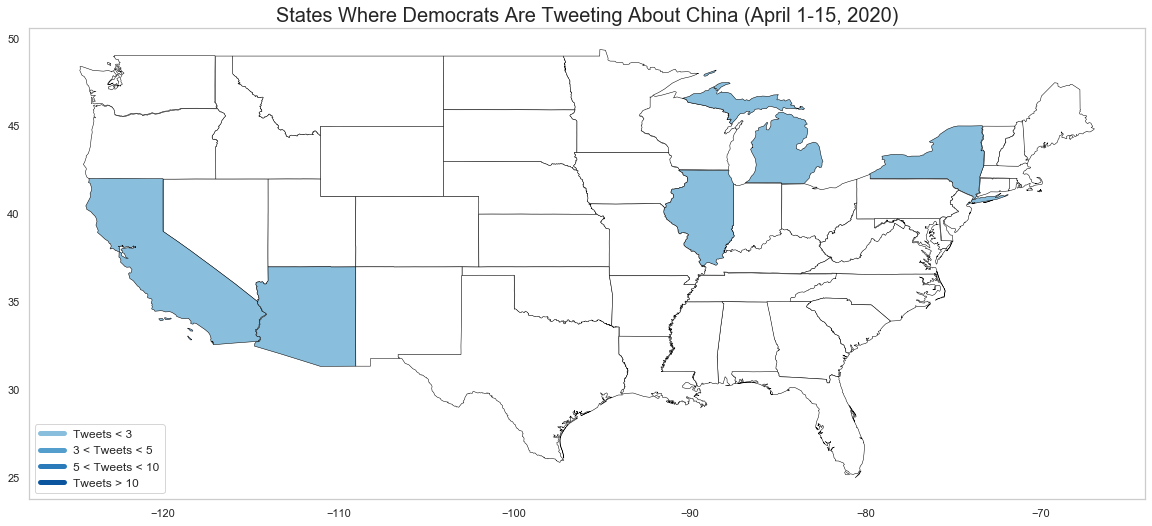

In [135]:
fig, ax = plt.subplots(figsize = (20,20))
ax.set_title("States Where Democrats Are Tweeting About China (April 1-15, 2020)", fontsize = 20)
ax.grid(False)

from matplotlib.lines import Line2D

legend_elements = [Line2D([0], [0], color = "#89bedc", lw = 5, label = "Tweets < 3"),
          Line2D([0], [0], color = "#539ecd", lw = 5, label = "3 < Tweets < 5"),
          Line2D([0], [0], color = "#2b7bba", lw = 5, label = "5 < Tweets < 10"),
          Line2D([0], [0], color = "#0b559f", lw = 5, label = "Tweets > 10")]
ax.legend(handles = legend_elements, loc = "lower left", fontsize = "large")


before_frequency_list = dems_before.to_dict(orient = "records")

state_list = []
for dictionary in before_frequency_list:
    state = dictionary["State"]
    state_list.append(state)
    
for state in usa["STATE_ABBR"]:
    if state == "AK" or state == "HI":
        continue
    if state in state_list:
        for dictionary in before_frequency_list:
            if dictionary["State"] == state:
                if dictionary["April 1-15 Count"] < 3:
                    usa[usa.STATE_ABBR == state].plot(ax = ax, color = "#89bedc", edgecolor = "black", linewidth = .5)
                elif 3 < dictionary["April 1-15 Count"] < 5:
                    usa[usa.STATE_ABBR == state].plot(ax = ax, color = "#539ecd", edgecolor = "black", linewidth = .5)
                elif 5 < dictionary["April 1-15 Count"] < 10:
                    usa[usa.STATE_ABBR == state].plot(ax = ax, color = "#2b7bba", edgecolor = "black", linewidth = .5)
                elif dictionary["April 1-15 Count"] > 10:
                    usa[usa.STATE_ABBR == state].plot(ax = ax, color = "#0b559f", edgecolor = "black", linewidth = .5)
                else:
                    usa[usa.STATE_ABBR == state].plot(ax = ax, color = "white", edgecolor = "black", linewidth = .5)
    else:
        usa[usa.STATE_ABBR == state].plot(ax = ax, color = "white", edgecolor = "black", linewidth = .5)
        continue

### Tweets from Last Half of April:

In [52]:
after_dict = {}
start_date = datetime.datetime(2020, 4, 16, 0, 0, 0)
end_date = datetime.datetime(2020, 4, 30, 0, 0, 0)

for handle in dem_handle_list:
    tweets = []
    username = handle

    for tweet in api.user_timeline(id = username, include_rts = True, count = 100):
        if tweet.created_at < end_date and tweet.created_at > start_date:
            tweet = tweet.text
            if tweet.find("China") >= 0 or tweet.find("Chinese") >= 0 or tweet.find("Beijing") >= 0 or tweet.find("Wuhan") >= 0:
                tweets.append(tweet)
    after_dict[handle] = tweets
    
after_dict

{'@RepAdams': [],
 '@RepPeteAguilar': [],
 '@RepColinAllred': [],
 '@RepCindyAxne': [],
 '@SenatorBaldwin': [],
 '@RepBarragan': [],
 '@RepKarenBass': [],
 '@RepBeatty': [],
 '@SenatorBennet': [],
 '@RepBera': ['The #COVID19 pandemic has reinforced this. Since originating in China in Dec. 2019, the virus has quickly spread to… https://t.co/HhjaJwS5y0'],
 '@RepDonBeyer': [],
 '@SanfordBishop': [],
 '@repblumenauer': [],
 '@SenBlumenthal': [],
 '@RepLBR': [],
 '@RepBonamici': ['RT @ChineseOregon: Thank you, Mrs. Bonamici @RepBonamici . We are grateful for the love and support from every corner of Oregon. We are all…',
  'I spoke with @ChineseOregon’s President Hongcheng Zhao this weekend, and it was heartening to hear how the communit… https://t.co/mOnIBXZEyM',
  "RT @ChineseOregon: 12,390 Halyard Fluidshield N95 Respirators have arrived at Portland after 3-week+ waiting. We couldn't make it without t…"],
 '@SenBooker': [],
 '@CongBoyle': [],
 '@RepBrindisi': [],
 '@RepAnthonyBrown': [],

In [139]:
after_chinatweets_dict = {}
count = 0

for handle in dem_handle_list:
    for tweet in after_dict[handle]:
        after_chinatweets_dict[handle] = len(after_dict[handle])
    count += len(after_dict[handle])
    
after_chinatweets_dict

{'@RepBera': 1,
 '@RepBonamici': 3,
 '@SenatorCarper': 2,
 '@JoaquinCastrotx': 1,
 '@RepJudyChu': 4,
 '@RepDelBene': 1,
 '@RepEliotEngel': 1,
 '@RepHastingsFL': 1,
 '@jahimes': 1,
 '@maziehirono': 1,
 '@RepRoKhanna': 1,
 '@JimLangevin': 2,
 '@RepRickLarsen': 2,
 '@SenatorLeahy': 3,
 '@RepLipinski': 2,
 '@BettyMcCollum04': 1,
 '@RepMcGovern': 1,
 '@BillPascrell': 4,
 '@SenGaryPeters': 2,
 '@RepDeanPhillips': 1,
 '@RepMikeQuigley': 1,
 '@RepSarbanes': 1,
 '@SenatorShaheen': 1,
 '@RepShalala': 1,
 '@BradSherman': 1,
 '@RepSlotkin': 1,
 '@RepSpeier': 1,
 '@RepTomSuozzi': 1,
 '@CongressmanJVD': 1,
 '@RonWyden': 1}

In [140]:
count

45

In [147]:
len(after)

30

In [57]:
after = pd.DataFrame.from_dict(after_chinatweets_dict, orient = "index")
after = after.reset_index()
after = after.rename(columns = {"index":"Twitter Handle"})
after

,Twitter Handle,0
0,@RepBera,1
1,@RepBonamici,3
2,@SenatorCarper,2
3,@JoaquinCastrotx,1
4,@RepJudyChu,4
5,@RepDelBene,1
6,@RepEliotEngel,1
7,@RepHastingsFL,1
8,@jahimes,1
9,@maziehirono,1


In [68]:
after_count_frame = dem_frame.copy()
after_count_frame = dem_frame.merge(after, left_on="Twitter Handle", right_on="Twitter Handle")
pd.set_option("display.max_rows", None)
after_count_frame.columns = ["State", "Twitter Handle", "Last Name", "First Name", "April 16-30 Count"]
after_count_frame

,State,Twitter Handle,Last Name,First Name,April 16-30 Count
0,CA,@RepBera,Bera,Ami,1
1,OR,@RepBonamici,Bonamici,Suzanne,3
2,DE,@SenatorCarper,Carper,Thomas,2
3,TX,@JoaquinCastrotx,Castro,Joaquin,1
4,CA,@RepJudyChu,Chu,Judy,4
5,WA,@RepDelBene,DelBene,Suzan,1
6,NY,@RepEliotEngel,Engel,Eliot,1
7,FL,@RepHastingsFL,Hastings,Alcee,1
8,CT,@jahimes,Himes,James,1
9,HI,@maziehirono,Hirono,Mazie,1


In [150]:
after_count_frame["April 16-30 Count"].max()

4

In [152]:
after_by_state = after_count_frame.groupby("State").sum()
after_by_state.to_csv("dems_after.csv")
after_by_state = after_by_state.sort_values("April 16-30 Count")
after_by_state

,April 16-30 Count
State,
CT,1
HI,1
TX,1
MA,1
MD,1
NH,1
DE,2
FL,2
RI,2


In [151]:
after_by_state.max()

April 16-30 Count    8
dtype: int64

In [71]:
dems_after = pd.read_csv("dems_after.csv")
after_states = []
for after_state in dems_after["State"]:
    after_states.append(after_state)
after_states

['CA',
 'CT',
 'DE',
 'FL',
 'HI',
 'IL',
 'MA',
 'MD',
 'MI',
 'MN',
 'NH',
 'NJ',
 'NY',
 'OR',
 'RI',
 'TX',
 'VT',
 'WA']

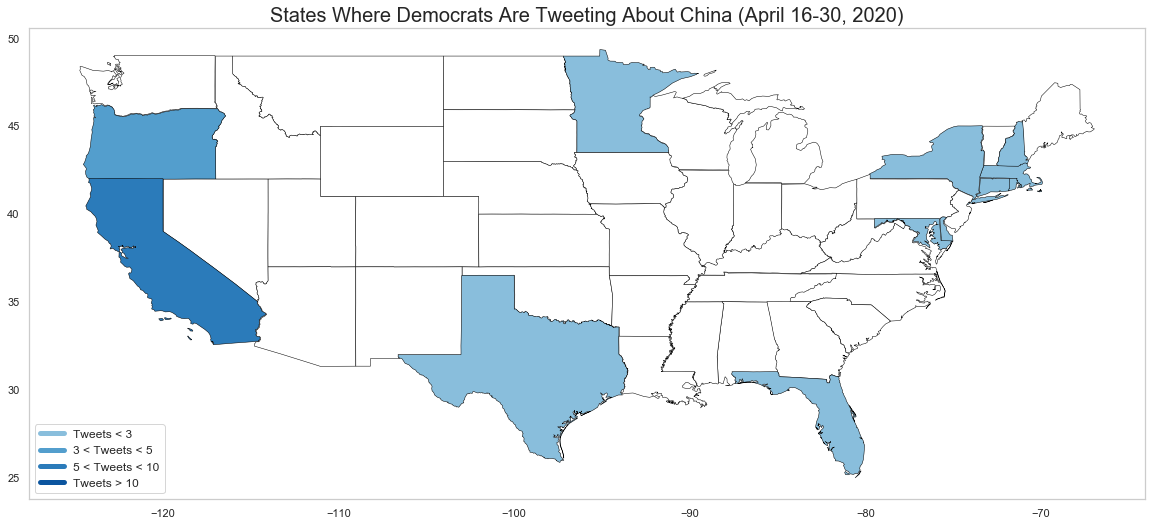

In [148]:
fig, ax = plt.subplots(figsize = (20,20))
ax.set_title("States Where Democrats Are Tweeting About China (April 16-30, 2020)", fontsize = 20)
ax.grid(False)


from matplotlib.lines import Line2D

legend_elements = [Line2D([0], [0], color = "#89bedc", lw = 5, label = "Tweets < 3"),
          Line2D([0], [0], color = "#539ecd", lw = 5, label = "3 < Tweets < 5"),
          Line2D([0], [0], color = "#2b7bba", lw = 5, label = "5 < Tweets < 10"),
          Line2D([0], [0], color = "#0b559f", lw = 5, label = "Tweets > 10")]
ax.legend(handles = legend_elements, loc = "lower left", fontsize = "large")

after_frequency_list = dems_after.to_dict(orient = "records")

state_list = []
for dictionary in after_frequency_list:
    state = dictionary["State"]
    state_list.append(state)
    
for state in usa["STATE_ABBR"]:
    if state == "AK" or state == "HI":
        continue
    if state in after_states:
        for dictionary in after_frequency_list:
            if dictionary["State"] == state:
                if dictionary["April 16-30 Count"] < 3:
                    usa[usa.STATE_ABBR == state].plot(ax = ax, color = "#89bedc", edgecolor = "black", linewidth = .5)
                elif 3 < dictionary["April 16-30 Count"] < 5:
                    usa[usa.STATE_ABBR == state].plot(ax = ax, color = "#539ecd", edgecolor = "black", linewidth = .5)
                elif 5 < dictionary["April 16-30 Count"] < 10:
                    usa[usa.STATE_ABBR == state].plot(ax = ax, color = "#2b7bba", edgecolor = "black", linewidth = .5)
                elif dictionary["April 16-30 Count"] > 10:
                    usa[usa.STATE_ABBR == state].plot(ax = ax, color = "#0b559f", edgecolor = "black", linewidth = .5)
                else:
                    usa[usa.STATE_ABBR == state].plot(ax = ax, color = "white", edgecolor = "black", linewidth = .5)
    else:
        usa[usa.STATE_ABBR == state].plot(ax = ax, color = "white", edgecolor = "black", linewidth = .5)
        continue